In [41]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
from sklearn import metrics 
from sklearn import preprocessing
from sklearn import utils
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [42]:
data = pd.read_csv('Steeldata.csv')
data

,Unnamed: 0,Country,Year,Category,State,Type,Consumption
0,0,India,2021,Non-Alloy Finished Steel,Jammu and Kashmir,Bars and Rods,5.71420
1,1,India,2020,Non-Alloy Finished Steel,Jammu and Kashmir,Stainless Steel,5.16517
2,2,India,2021,Non-Alloy Finished Steel,Andhra Pradesh,Stainless Steel,45.71400
3,3,India,2021,Non-Alloy Finished Steel,Andhra Pradesh,HR Coil,43.56800
4,4,India,2020,Non-Alloy Finished Steel,Andhra Pradesh,Bars and Rods,45.71400
...,...,...,...,...,...,...,...
996,996,India,2021,Non-Alloy Finished Steel,Jammu and Kashmir,Stainless Steel,45.28570
997,997,India,2021,Non-Alloy Finished Steel,Maharashtra,Stainless Steel,40.28570
998,998,India,2021,Non-Alloy Finished Steel,Delhi,Galvanized Iron Coil,46.49985
999,999,India,2021,Non-Alloy Finished Steel,Himachal Pradesh,HR Coil,39.64270


In [43]:
for i in range(len(data["Country"])):
  data["Country"][i] = 0

In [44]:
for i in range(len(data["Category"])):
  data["Category"][i] = 0

In [45]:
data

,Unnamed: 0,Country,Year,Category,State,Type,Consumption
0,0,0,2021,0,Jammu and Kashmir,Bars and Rods,5.71420
1,1,0,2020,0,Jammu and Kashmir,Stainless Steel,5.16517
2,2,0,2021,0,Andhra Pradesh,Stainless Steel,45.71400
3,3,0,2021,0,Andhra Pradesh,HR Coil,43.56800
4,4,0,2020,0,Andhra Pradesh,Bars and Rods,45.71400
...,...,...,...,...,...,...,...
996,996,0,2021,0,Jammu and Kashmir,Stainless Steel,45.28570
997,997,0,2021,0,Maharashtra,Stainless Steel,40.28570
998,998,0,2021,0,Delhi,Galvanized Iron Coil,46.49985
999,999,0,2021,0,Himachal Pradesh,HR Coil,39.64270


In [46]:
print(data['Type'].unique())
GI, HR, SS, BR = 'Galvanized Iron Coil', 'HR Coil', 'Stainless Steel', 'Bars and Rods'
for i in range(len(data["Type"])):
    if data['Type'][i] == GI:
      data["Type"][i] = 1
    if data['Type'][i] == HR:
      data["Type"][i] = 2
    if data['Type'][i] == SS:
      data["Type"][i] = 3
    if data['Type'][i] == BR:
      data["Type"][i] = 4

['Bars and Rods' 'Stainless Steel' 'HR Coil' 'Galvanized Iron Coil']


In [47]:
data

,Unnamed: 0,Country,Year,Category,State,Type,Consumption
0,0,0,2021,0,Jammu and Kashmir,4,5.71420
1,1,0,2020,0,Jammu and Kashmir,3,5.16517
2,2,0,2021,0,Andhra Pradesh,3,45.71400
3,3,0,2021,0,Andhra Pradesh,2,43.56800
4,4,0,2020,0,Andhra Pradesh,4,45.71400
...,...,...,...,...,...,...,...
996,996,0,2021,0,Jammu and Kashmir,3,45.28570
997,997,0,2021,0,Maharashtra,3,40.28570
998,998,0,2021,0,Delhi,1,46.49985
999,999,0,2021,0,Himachal Pradesh,2,39.64270


In [48]:
ff= data['State'].unique()
m = {i:0 for i in ff}
c = 10
for i in ff:
  m[i]+=c
  c+=1
print(m)

{'Jammu and Kashmir': 10, 'Andhra Pradesh': 11, 'Arunachal Pradesh': 12, 'Assam': 13, 'Bihar': 14, 'Chhattisgarh': 15, 'Goa': 16, 'Gujarat': 17, 'Haryana': 18, 'Himachal Pradesh': 19, 'Jharkhand': 20, 'Karnataka': 21, 'Kerala': 22, 'Madhya Pradesh': 23, 'Maharashtra': 24, 'Manipur': 25, 'Meghalaya': 26, 'Mizoram': 27, 'Nagaland': 28, 'Odisha': 29, 'Punjab': 30, 'Rajasthan': 31, 'Sikkim': 32, 'Tamil Nadu': 33, 'Telangana': 34, 'Tripura': 35, 'Uttar Pradesh': 36, 'Uttarakhand': 37, 'West Bengal': 38, 'Chandigarh': 39, 'Delhi': 40}


In [49]:
kk  = []
for i in range(len(data["State"])):
  data['State'][i] = m[data["State"][i]]
data

,Unnamed: 0,Country,Year,Category,State,Type,Consumption
0,0,0,2021,0,10,4,5.71420
1,1,0,2020,0,10,3,5.16517
2,2,0,2021,0,11,3,45.71400
3,3,0,2021,0,11,2,43.56800
4,4,0,2020,0,11,4,45.71400
...,...,...,...,...,...,...,...
996,996,0,2021,0,10,3,45.28570
997,997,0,2021,0,24,3,40.28570
998,998,0,2021,0,40,1,46.49985
999,999,0,2021,0,19,2,39.64270


In [50]:
data.drop('Country', axis=1, inplace=True)
data.drop('Category', axis=1, inplace=True)
data

,Unnamed: 0,Year,State,Type,Consumption
0,0,2021,10,4,5.71420
1,1,2020,10,3,5.16517
2,2,2021,11,3,45.71400
3,3,2021,11,2,43.56800
4,4,2020,11,4,45.71400
...,...,...,...,...,...
996,996,2021,10,3,45.28570
997,997,2021,24,3,40.28570
998,998,2021,40,1,46.49985
999,999,2021,19,2,39.64270


In [51]:
X = data[["Year", "State"]]
X

,Year,State
0,2021,10
1,2020,10
2,2021,11
3,2021,11
4,2020,11
...,...,...
996,2021,10
997,2021,24
998,2021,40
999,2021,19


In [52]:
Y = data["Consumption"]
Y

0        5.71420
1        5.16517
2       45.71400
3       43.56800
4       45.71400
          ...   
996     45.28570
997     40.28570
998     46.49985
999     39.64270
1000    56.33050
Name: Consumption, Length: 1001, dtype: float64

In [53]:
model = linear_model.LinearRegression()

In [54]:
model.fit(X, Y)

LinearRegression()

In [55]:
model.predict([[2021, 10]])

array([36.059294])

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
Y_pred = model.predict(X_test)

In [57]:
score = r2_score(Y_test, Y_pred)
print(score)

-0.0004395513303017129


In [58]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':Y_pred,'Difference':Y_test-Y_pred})

In [59]:
pred_df

,Actual Value,Predicted Value,Difference
708,42.714270,36.818508,5.895762
533,64.000000,36.673697,27.326303
298,44.828400,36.397187,8.431213
356,44.828400,36.059294,8.769106
833,32.856850,36.614405,-3.757555
...,...,...,...
889,66.114100,36.324782,29.789318
474,12.868285,36.649561,-23.781276
416,40.785570,36.300646,4.484924
10,17.142800,36.131700,-18.988900


In [60]:
from collections import defaultdict
k = defaultdict(int)
for i in data["Year"]:
    k[i]+=1
store1 , store2 = [],[]
for i in k:
    store1.append(i)
    store2.append(k[i])
print(store1)
print(store2)

[2021, 2020, 2019]
[715, 246, 40]


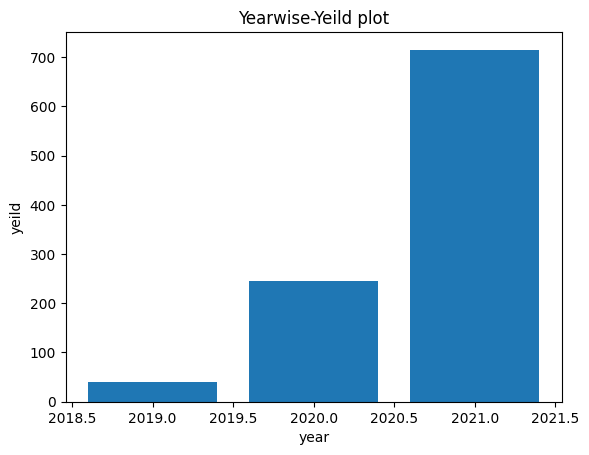

In [62]:
x = store1
y = store2
plt.bar(x,y)
plt.xlabel("year")
plt.ylabel("yeild")
plt.title("Yearwise-Yeild plot")
plt.show()